## Principle Component Analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

##### (a) Implementing PCA

In [2]:
def PCA(A, num_components):
    # normalization
    A_mean = A - np.mean(A, axis=0)
    # covariance matrix
    A_cov = np.cov(A_mean, rowvar=False)
    # Eigen values and eigen vectors of the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eigh(A_cov)
    
    # choose components
    # sort eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvector = eigen_vectors[:,sorted_index]
    # select the first num_components eigenvectors 
    eigenvector_subset = sorted_eigenvector[:,0:num_components]
    A_reduced = np.dot(eigenvector_subset.transpose(), A_mean.transpose()).transpose()
    
    # total percentage of explained variance with the given number of components
    total_eigenvalue = sum(eigen_values)
    var_explained = [(i/total_eigenvalue) for i in sorted_eigenvalue[0:num_components]]
    total_percentage = sum(var_explained)
    
    return A_reduced, total_percentage

##### (b) Finding the optimal number of components

(57, 199)


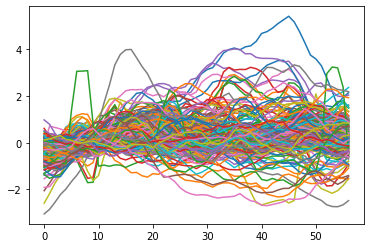

In [3]:
data_file = 'data_all_button_press_window_events_hg.npy'
data = np.load(data_file)

print(data.shape)
num_of_channels = data.shape[1]

plt.plot(data)
plt.show()

In [4]:
norm = StandardScaler().fit_transform(data)
total_explained_variance = np.zeros(num_of_channels)
for i in range(1,num_of_channels+1):
    total_explained_variance[i-1] = PCA(norm,i)[1]

0.9999981772124356 54


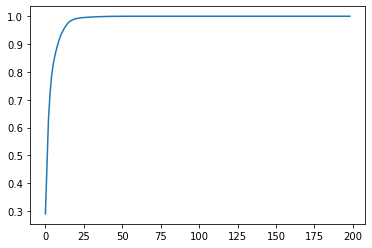

In [5]:
# normalization
norm = StandardScaler().fit_transform(data)
# fit pca
total_explained_variance = np.zeros(num_of_channels)
for i in range(1,num_of_channels+1):
    # pca = PCA(norm,i)
    total_explained_variance[i-1] = PCA(norm,i)[1]

index = np.argwhere(total_explained_variance==1)[0][0] - 1
high_explained_variance = total_explained_variance[index]
print(high_explained_variance, index)

plt.plot(total_explained_variance)
plt.show()

Choose optimal component number 54, where the best relativity gained. Because after 55 the total explained variance reach 1, which means from that point on the data doesn't make sense anymore.

##### (c) Visualizing clustering results

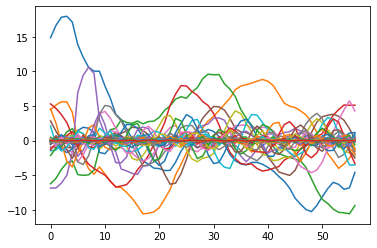

In [6]:
pca_optimal = PCA(norm,54)
plt.plot(pca_optimal[0])
plt.show()